<a href="https://colab.research.google.com/github/kh-ops69/Data_science/blob/master/Nobel_prize_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction
See what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('Data/nobel_prize_data.csv')

# Data Exploration & Cleaning

In [ ]:
df_data.shape, df_data.columns, df_data.year.min(), df_data.year.max()

((962, 16), Index(['year', 'category', 'prize', 'motivation', 'prize_share',
        'laureate_type', 'full_name', 'birth_date', 'birth_city',
        'birth_country', 'birth_country_current', 'sex', 'organization_name',
        'organization_city', 'organization_country', 'ISO'],
       dtype='object'), 1901, 2020)

### Check for Duplicates

In [ ]:
df_data.duplicated()
df_data.isna().values.any()
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Check for NaN Values

In [ ]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


#### Convert Year and Birth Date to Datetime

In [ ]:
tra = pd.to_datetime(df_data.birth_date)
tra.dt.year

0     1,852.00
1     1,839.00
2     1,854.00
3     1,822.00
4     1,828.00
        ...   
957   1,949.00
958        NaN
959   1,965.00
960   1,952.00
961   1,931.00
Name: birth_date, Length: 962, dtype: float64

#### Add a Column with the Prize Share as a Percentage

In [ ]:
share_pcts = []
separated_value = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_value[0])
denominator = pd.to_numeric(separated_value[1])
share_pct = numerator/denominator *100
for i in share_pct:
  share_pcts.append(i)
df_data['share_pct'] = share_pcts
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   962 non-null    int64  
 1   category               962 non-null    object 
 2   prize                  962 non-null    object 
 3   motivation             874 non-null    object 
 4   prize_share            962 non-null    object 
 5   laureate_type          962 non-null    object 
 6   full_name              962 non-null    object 
 7   birth_date             934 non-null    object 
 8   birth_city             931 non-null    object 
 9   birth_country          934 non-null    object 
 10  birth_country_current  934 non-null    object 
 11  sex                    934 non-null    object 
 12  organization_name      707 non-null    object 
 13  organization_city      707 non-null    object 
 14  organization_country   708 non-null    object 
 15  ISO   

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [ ]:
labels=['men', 'women']
values=[males, females]

In [ ]:
males = df_data.query('sex=="Male"').count()['sex']     #if you dont use double quotes pandas interprets it as another column name in the dataframe
females = df_data.query('sex=="Female"').count()['sex']
males,females

(876, 58)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
df_data.query('sex=="Female"').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners


In [ ]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
df_data[is_winner].shape

(13, 17)

# Number of Prizes per Category

In [ ]:
category = df_data.category.unique()
df_data.query(f'category=="{category[0]}"').count()['category']

186

In [ ]:
labels = [i for i in category]
values = [df_data.query(f'category=="{category[i]}"').count()['category'] for i in range(len(category))]
values

[186, 117, 222, 135, 216, 86]

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
v_bar = px.bar(
        x = labels,
        y = values,
        color = values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')

v_bar.update_layout(xaxis_title='Nobel Prize Category',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')

v_bar.show()

In [ ]:
df_data.query('category=="Economics"').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


In [ ]:
df_data.query(f'category=="{category[0]}"').count()['sex']

186

In [ ]:
df_data.category.value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [ ]:
lbls = [i for i in df_data.category.value_counts()]
first = [i for i in df_data.query('sex=="Female"')['category'].value_counts()]
second = [j for j in df_data.query('sex=="Male"')['category'].value_counts()]
tots = first+second
tots

[17, 16, 12, 7, 4, 2, 212, 210, 179, 101, 90, 84]

In [ ]:
df_data.query('sex=="Female"')['category'].value_counts()

Peace         17
Literature    16
Medicine      12
Chemistry      7
Physics        4
Economics      2
Name: category, dtype: int64

In [ ]:
try_bar = px.bar(
        x = lbls,
        y = tots,
        color = tots,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')

try_bar.update_layout(xaxis_title='Nobel Prize Category',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')

try_bar.show()

ValueError: ignored

In [ ]:
cat_men_women = df_data.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

In [ ]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')

v_bar_split.update_layout(xaxis_title='Nobel Prize Category',
                          yaxis_title='Number of Prizes')
v_bar_split.show()

In [ ]:
tria =df_data.groupby(['year']).agg({'prize':pd.Series.count})
compress = tria.rolling(window=5).mean()
compress

,prize
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,6.20
...,...
2016,11.60
2017,12.00
2018,12.00


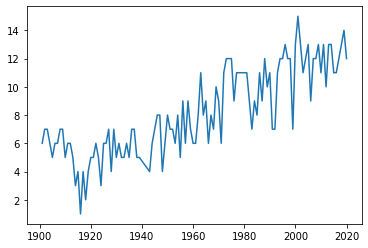

In [ ]:
plt.plot(tria)
plt.show()

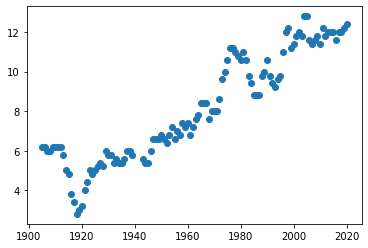

In [ ]:
plt.scatter(compress.index, compress.values)
plt.show()

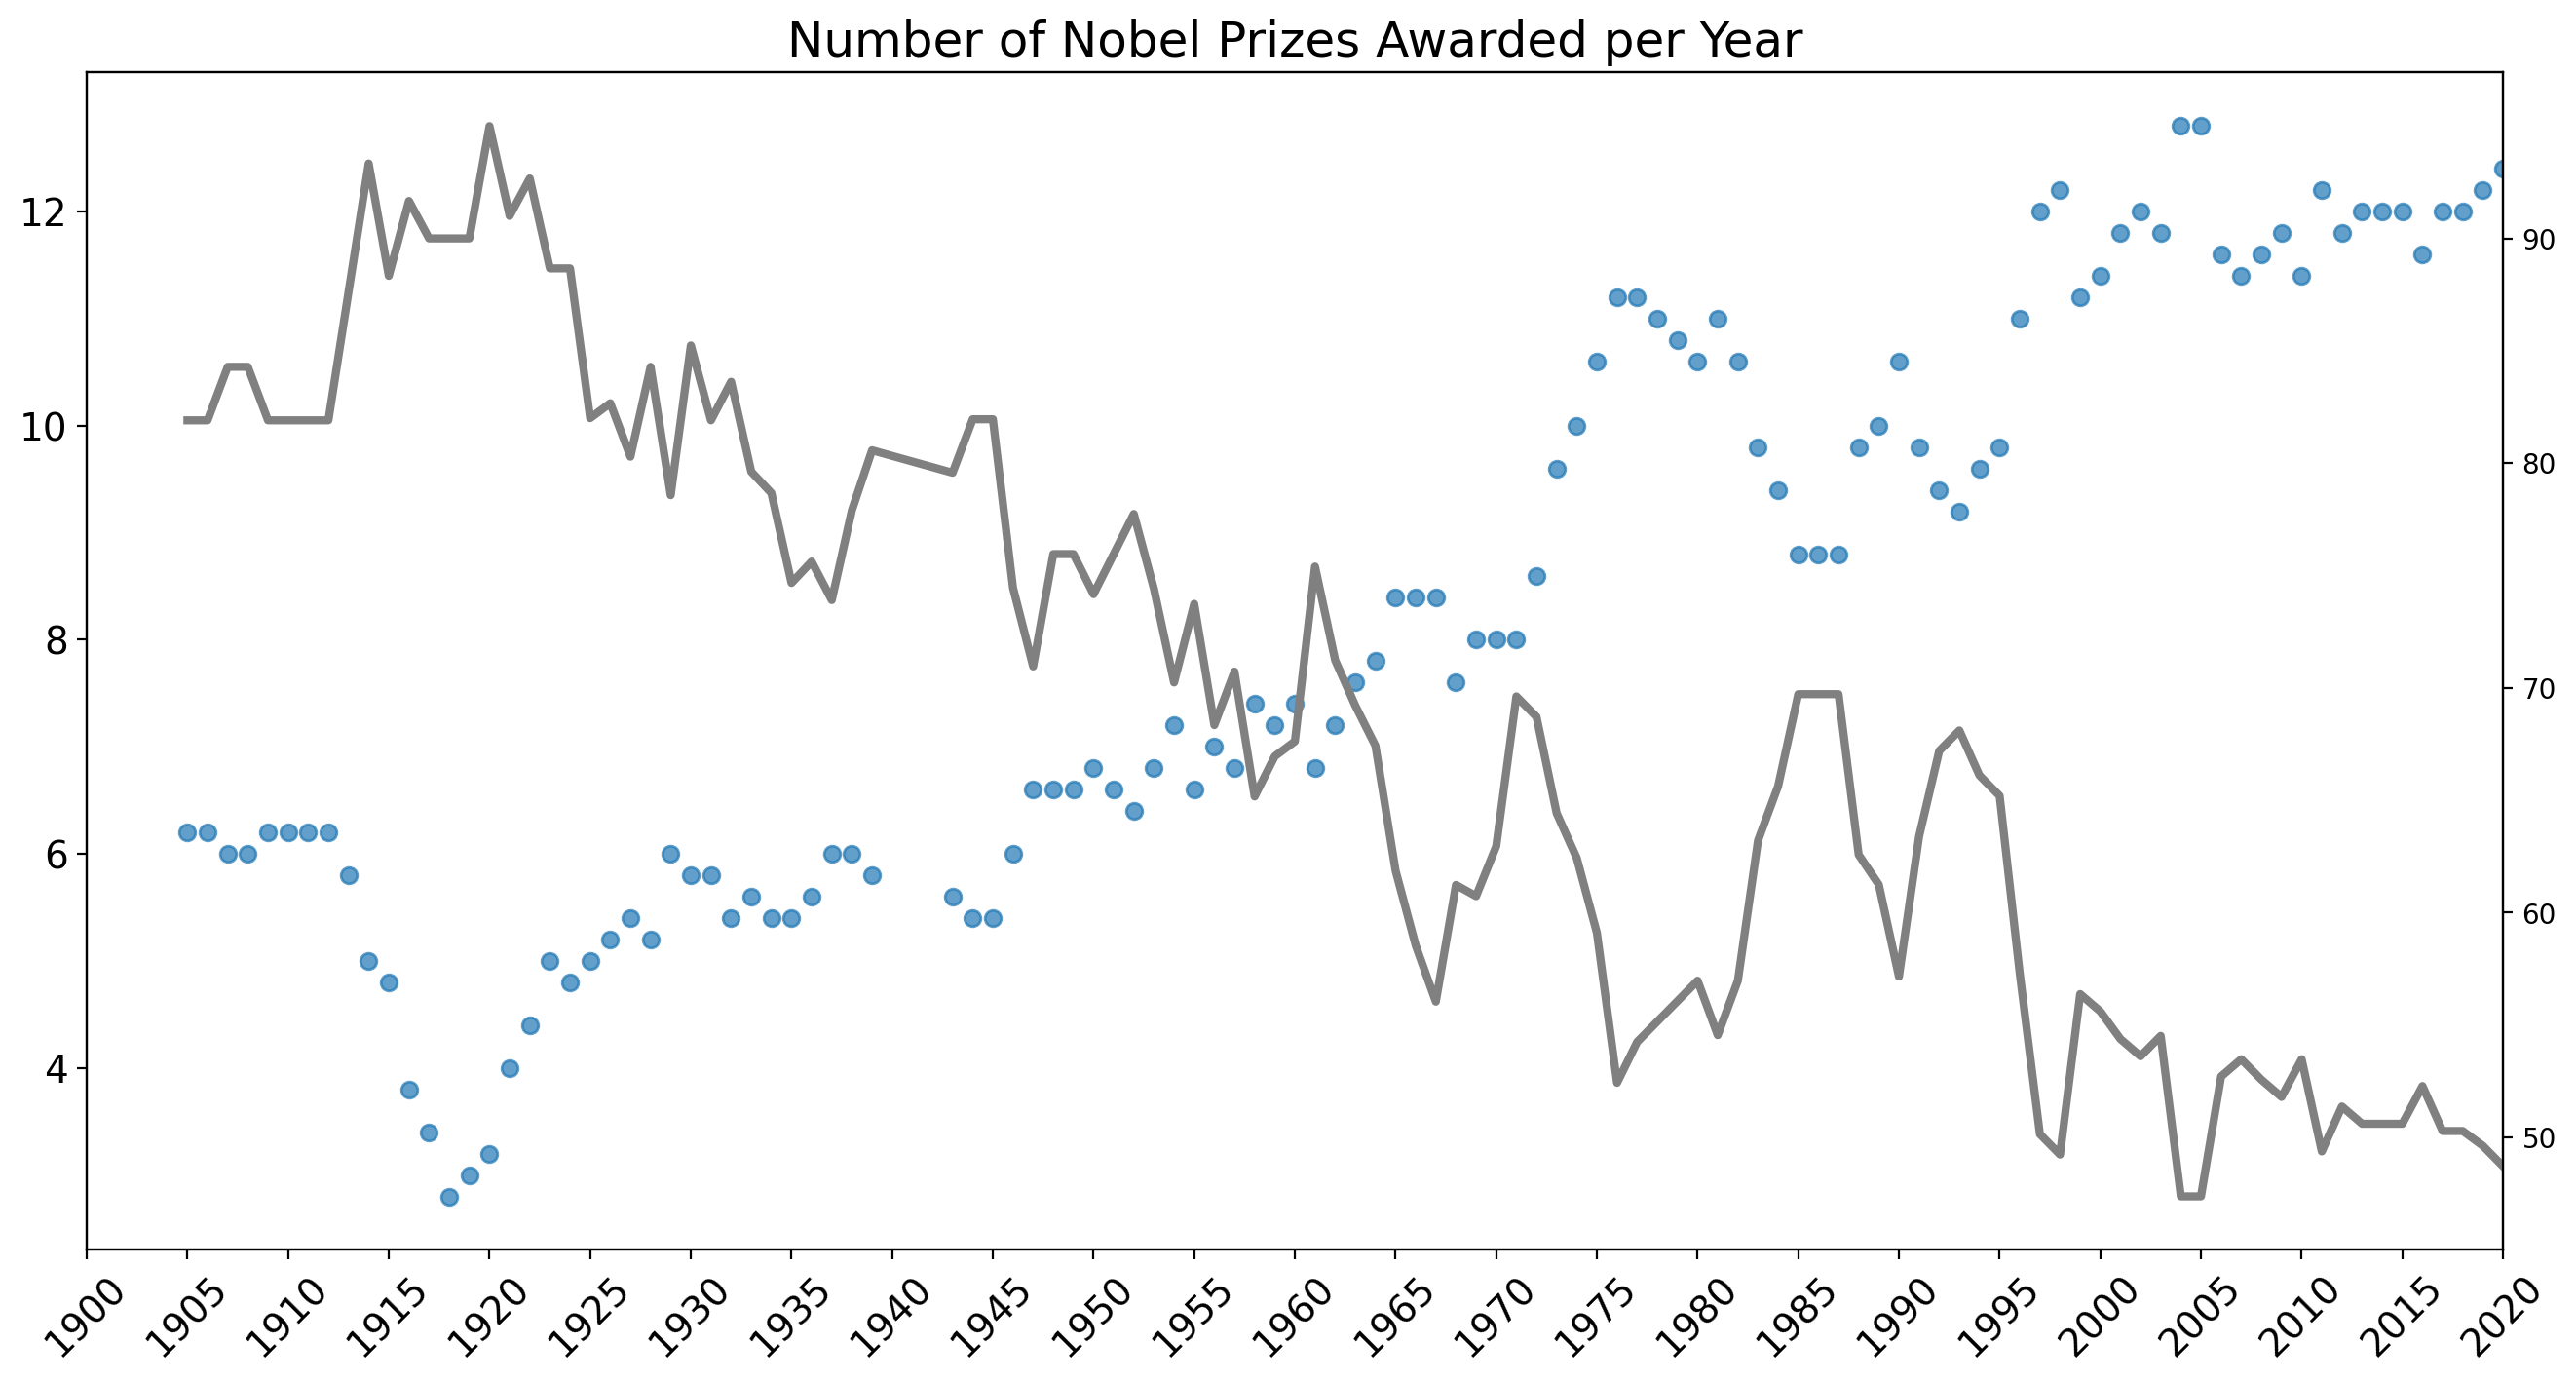

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=compress.index,
           y=compress.values,
           alpha=0.7,)

# Adding prize share plot on second axis
ax2.plot(compress.index,
        new_avg.values,
        c='grey',
        linewidth=3,)

plt.show()

In [ ]:
prize_per_year = df_data.groupby(by='year').count().prize
moving_average =  prize_per_year.rolling(window=5).mean()

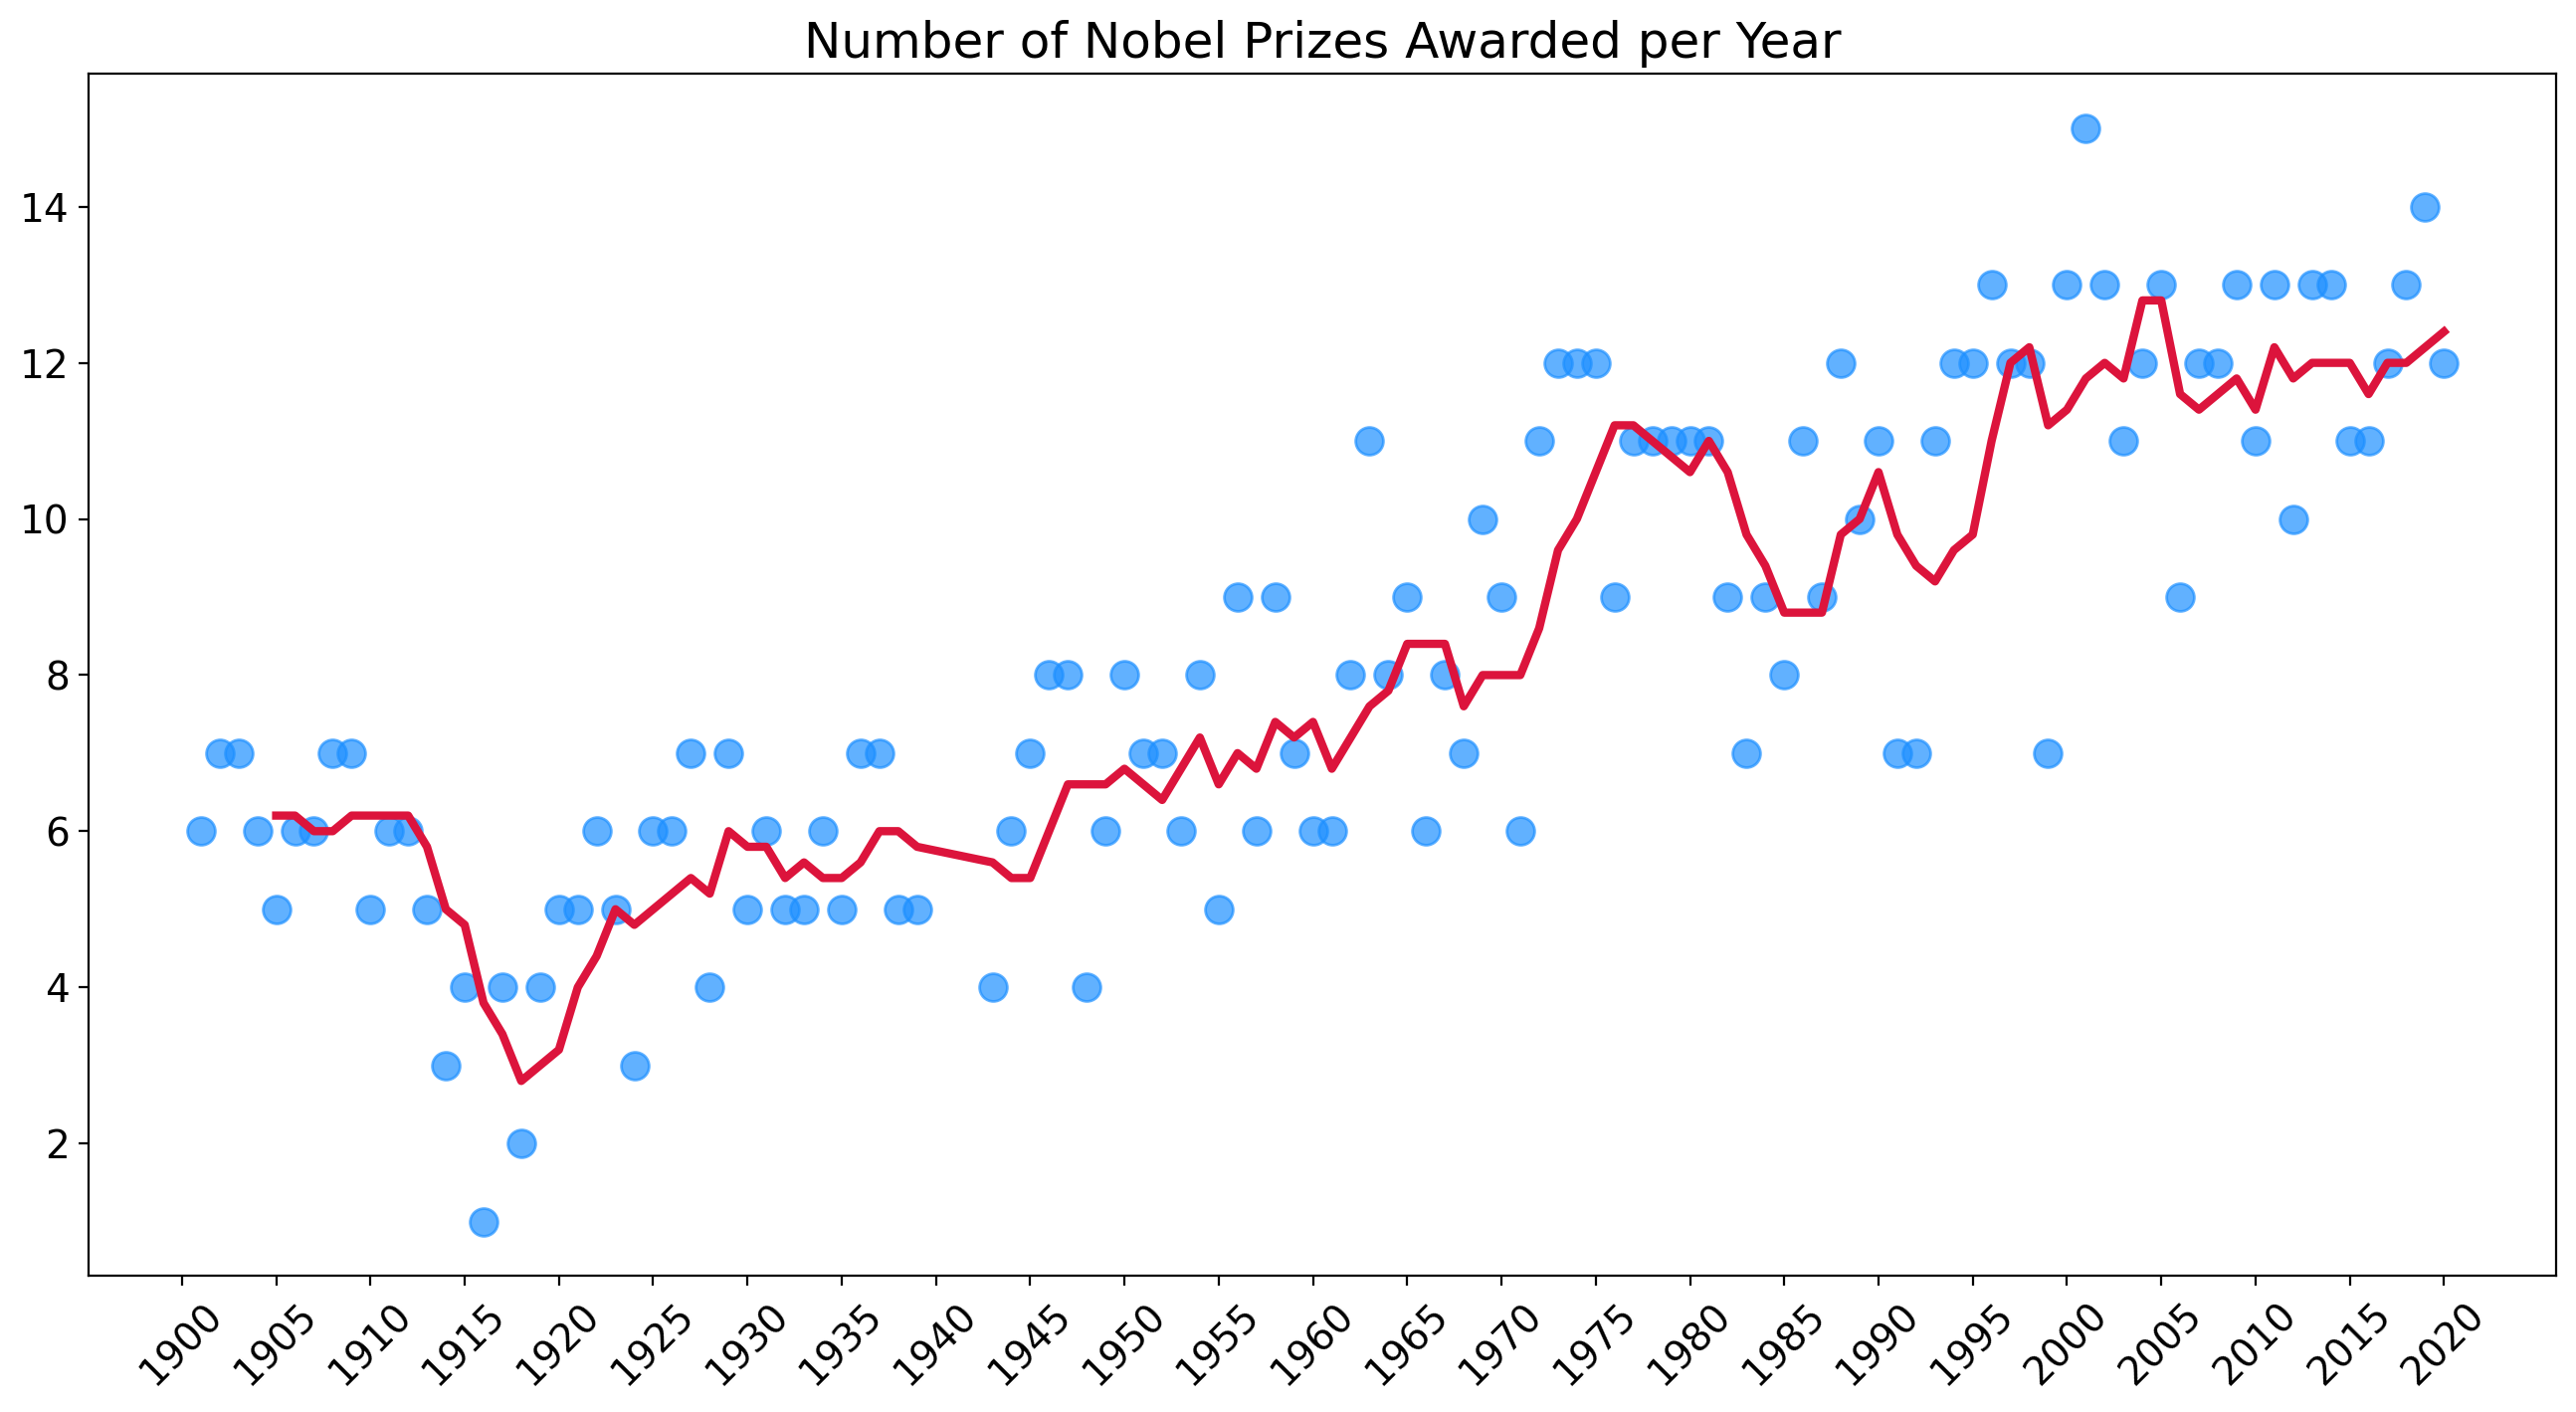

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)
plt.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

plt.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

plt.show()

In [ ]:
dat = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
new_avg = dat.rolling(window=5).mean()

average meaning agg in pandas

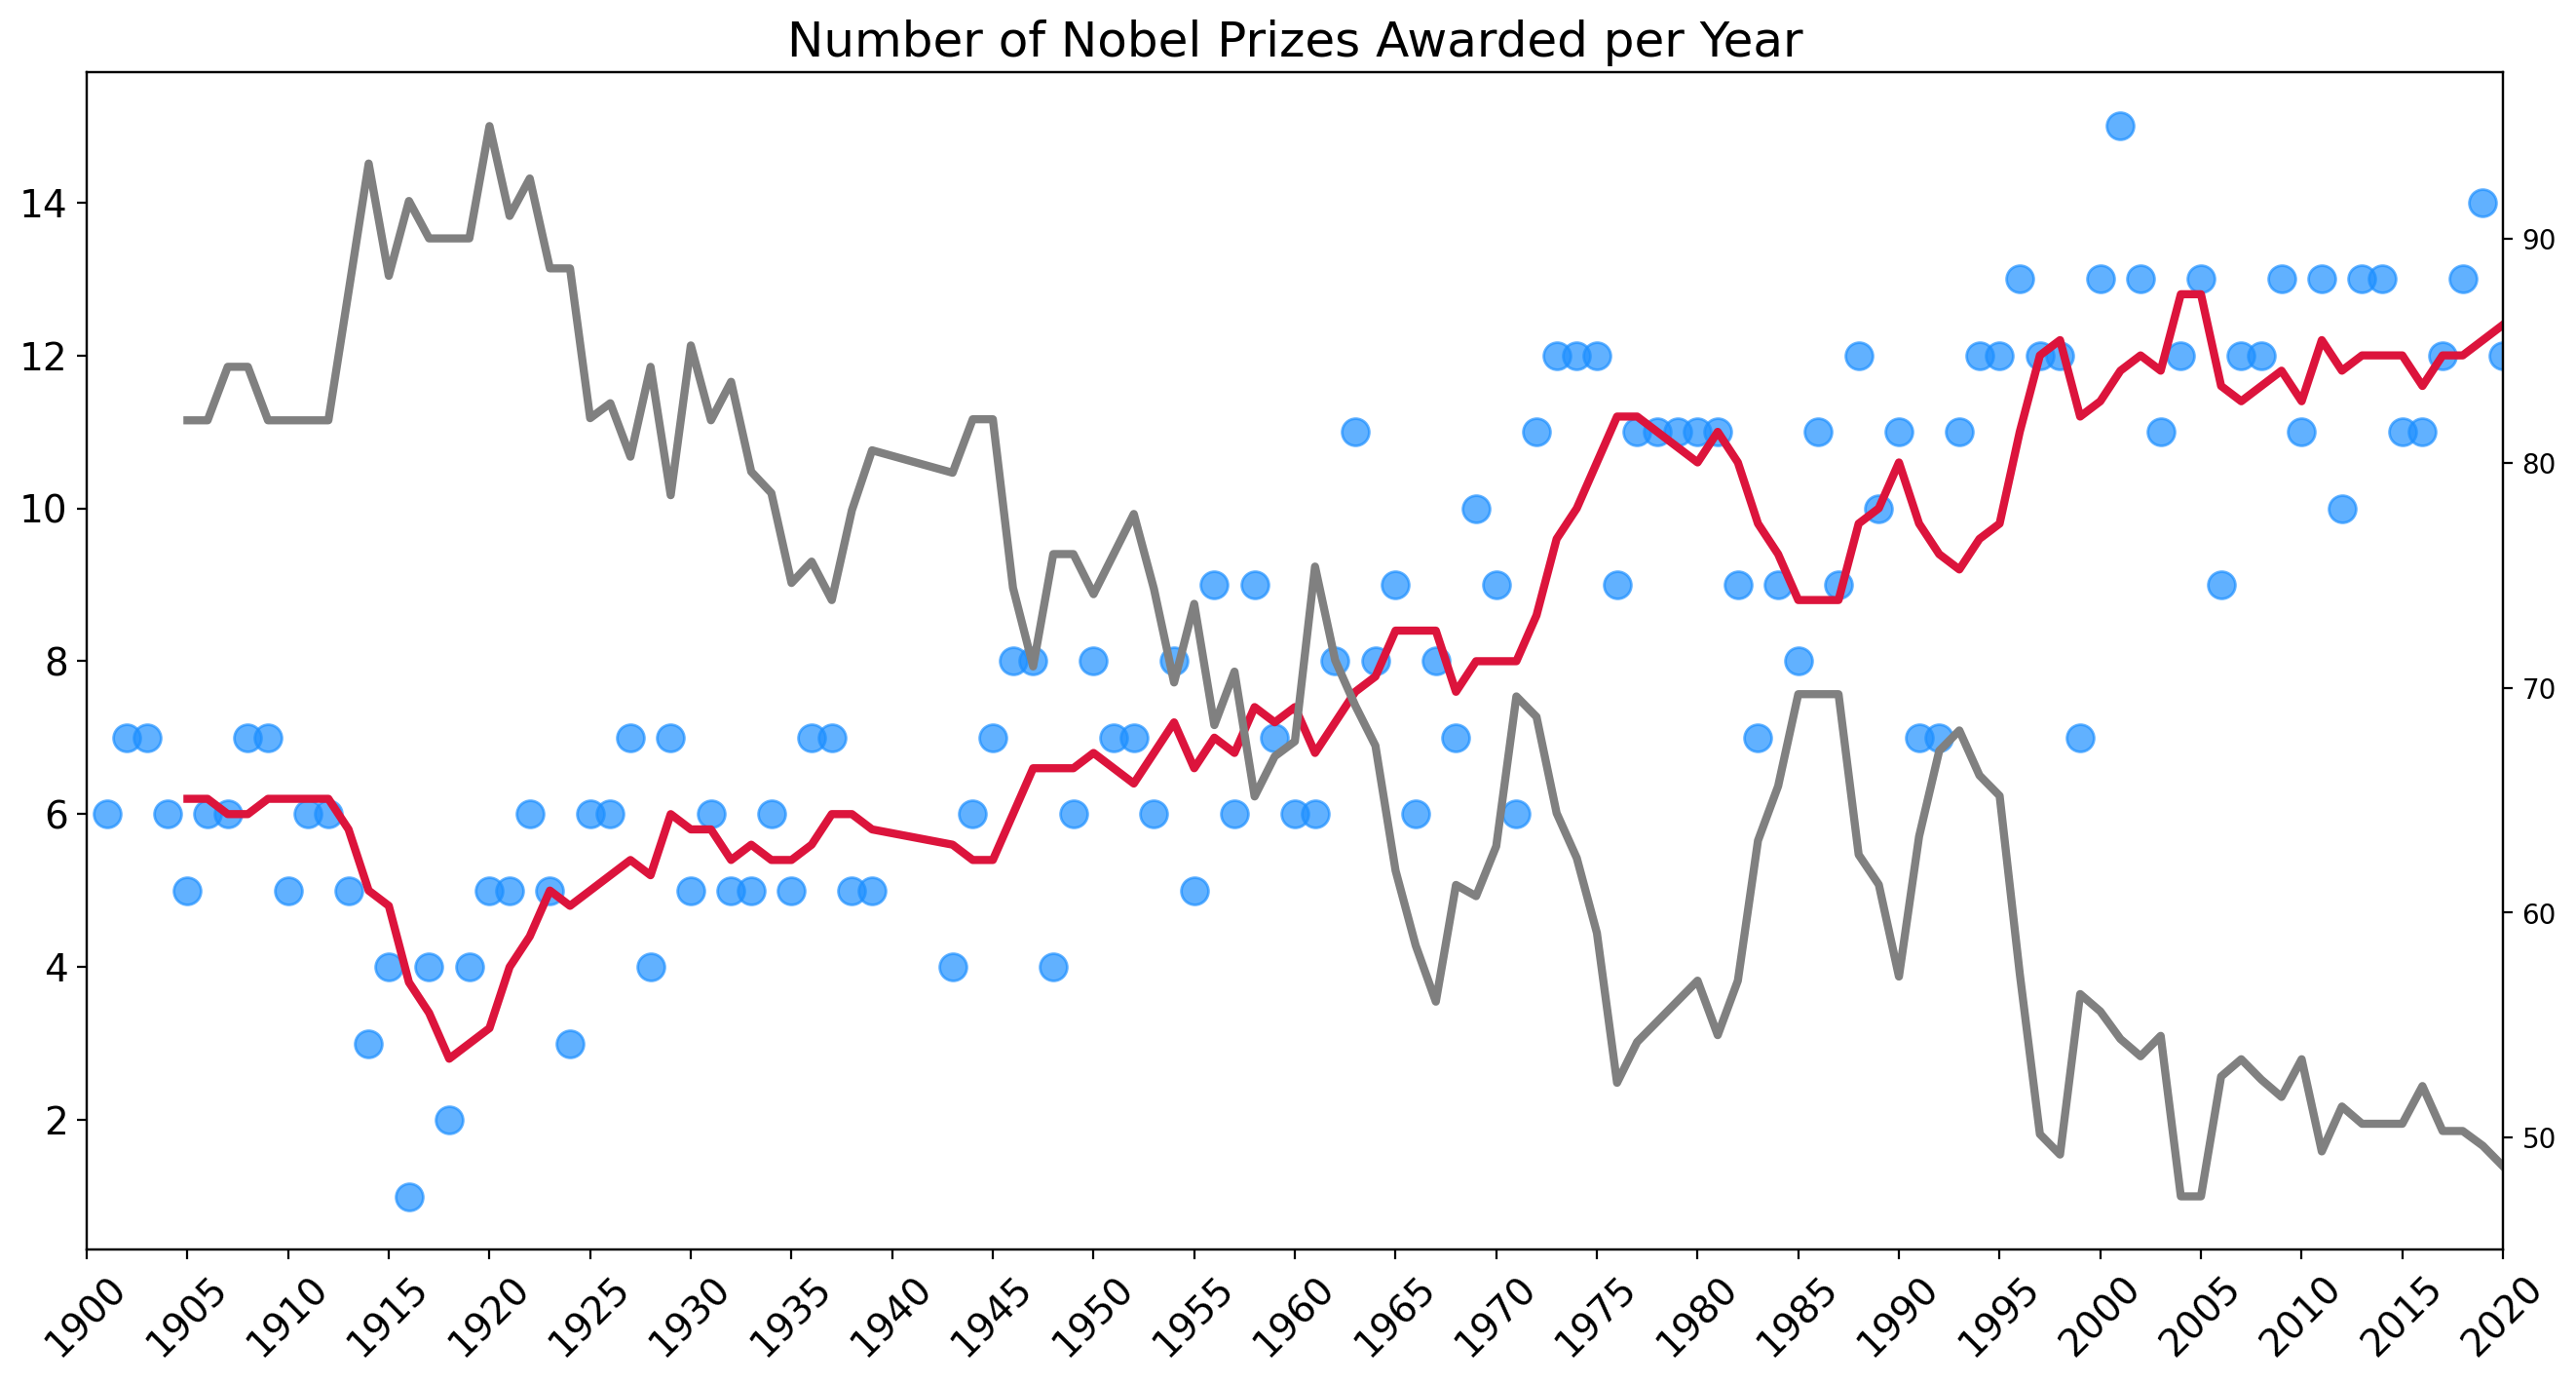

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

# Adding prize share plot on second axis
ax2.plot(prize_per_year.index,
        new_avg.values,
        c='grey',
        linewidth=3,)

plt.show()

# The Countries with the Most Nobel Prizes

In [ ]:
# top_20_countries = pd.DataFrame()
# top_20_countries['birth_country_current'] = df_data.birth_country_current.values
# top_20_countries['prizes'] = df_data.groupby('birth_country_current').agg({'prize':pd.Series.count})
# top_20_countries

,birth_country_current,prizes
0,Netherlands,NaN
1,France,NaN
2,Poland,NaN
3,France,NaN
4,Switzerland,NaN
...,...,...
957,United Kingdom,NaN
958,NaN,NaN
959,United States of America,NaN
960,Germany,NaN


In [ ]:
df_data.birth_country_current.value_counts()

United States of America    281
United Kingdom              105
Germany                      84
France                       57
Sweden                       29
                           ... 
Republic of Macedonia         1
Venezuela                     1
Bulgaria                      1
Madagascar                    1
Ethiopia                      1
Name: birth_country_current, Length: 79, dtype: int64

In [ ]:
topcountries = df_data.groupby('birth_country_current').agg({'prize':pd.Series.count})
top = topcountries.sort_values('prize', ascending=False)
top_20_countries = topcountries.sort_values('prize', ascending=False).head(20)

In [ ]:
top.index

Index(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Sweden', 'Japan', 'Poland', 'Russia', 'Canada', 'Switzerland', 'Italy',
       'Austria', 'Netherlands', 'Denmark', 'China', 'Norway', 'Australia',
       'Belgium', 'India', 'South Africa', 'Hungary', 'Spain', 'Israel',
       'Egypt', 'Czech Republic', 'Finland', 'Ireland', 'Ukraine', 'Romania',
       'Argentina', 'Belarus', 'Lithuania', 'New Zealand', 'Mexico',
       'Pakistan', 'Turkey', 'Luxembourg', 'Liberia', 'Saint Lucia',
       'Portugal', 'Korea (South Korea)', 'Algeria', 'Iran', 'East Timor',
       'Colombia', 'Chile', 'Bosnia and Herzegovina', 'Guatemala', 'Kenya',
       'Taiwan', 'Slovenia', 'Costa Rica', 'Bulgaria', 'Brazil', 'Trinidad',
       'Croatia', 'Bangladesh', 'Azerbaijan', 'Venezuela', 'Vietnam', 'Yemen',
       'Slovakia', 'Democratic Republic of the Congo', 'Cyprus', 'Latvia',
       'Republic of Macedonia', 'Ethiopia', 'Peru', 'Ghana', 'Greece',
       'Nigeria', 'Guadeloup

In [ ]:
top_20_countries.index[0]

'Algeria'

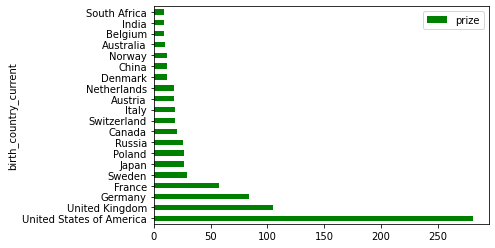

In [ ]:
top_20_countries.plot.barh(color={'prize':'green'})

In [ ]:
px.colors.sequential.Oranges_r
px.choropleth(top, locations=top.index, locationmode='country names', scope='world', color='prize',
              color_continuous_scale=px.colors.sequential.Oranges_r)

# In Which Categories are the Different Countries Winning Prizes?



In [ ]:
df_data.birth_country_current, df_data.category.unique()

(0                   Netherlands
 1                        France
 2                        Poland
 3                        France
 4                   Switzerland
                  ...           
 957              United Kingdom
 958                         NaN
 959    United States of America
 960                     Germany
 961              United Kingdom
 Name: birth_country_current, Length: 962, dtype: object,
 array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
        'Economics'], dtype=object))

In [ ]:
df_data.query(f'birth_country_current=="{df_data.birth_country_current.values[]}"').groupby('category').agg({'prize':pd.Series.count})

,prize
category,
Chemistry,10
Economics,4
Literature,11
Medicine,12
Peace,10
Physics,10


In [ ]:
df_data.groupby('category').agg({'prize':pd.Series.count}).index[0]

'Chemistry'

In [ ]:
df_data.groupby('birth_country_current').agg({'category':pd.Series.count})

,category
birth_country_current,
Algeria,2
Argentina,4
Australia,10
Austria,18
Azerbaijan,1
...,...
United States of America,281
Venezuela,1
Vietnam,1


In [ ]:
cat_country = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [ ]:
merged_df = pd.merge(cat_country, top_20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
108,India,Physics,1,9
107,India,Peace,1,9
88,South Africa,Peace,3,9
89,South Africa,Medicine,3,9
90,South Africa,Literature,2,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [ ]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes',
                            yaxis_title='Country')
cat_cntry_bar.show()

In [ ]:
com_df = df_data.groupby(['birth_country_current', 'year'], as_index=False).agg({'prize':pd.Series.count})
com_df

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,1
2,Argentina,1936,1
3,Argentina,1947,1
4,Argentina,1980,1
...,...,...,...
622,United States of America,2020,7
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
cumulative_prizes = com_df.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
fig = px.line(com_df, x="year", y="prize", title='number of prizes won by each country', color='birth_country_current')
fig.show()

In [ ]:
fig = px.line(cumulative_prizes, x="year", y="prize", title='number of prizes won by each country', color='birth_country_current')
fig.show()

# Top Research Organisations

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
org_df = df_data.groupby('organization_name').agg({'prize':pd.Series.count}).sort_values('prize', ascending=False).head(20)
org_df

,prize
organization_name,
University of California,40
Harvard University,29
Stanford University,23
Massachusetts Institute of Technology (MIT),21
University of Chicago,20
University of Cambridge,18
California Institute of Technology (Caltech),17
Columbia University,17
Princeton University,15


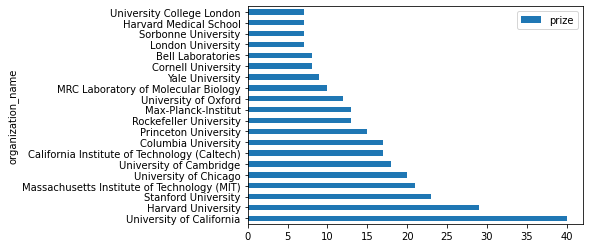

In [ ]:
org_df.plot.barh()

# Cities that make the most discoveries

In [ ]:
orgcit_df = df_data.groupby(['organization_name', 'organization_city', 'birth_country_current']).agg({'prize':pd.Series.count}).sort_values('prize', ascending=False).head(40)
orgcit_df

,,,prize
organization_name,organization_city,birth_country_current,
Harvard University,"Cambridge, MA",United States of America,23
Stanford University,"Stanford, CA",United States of America,18
University of Cambridge,Cambridge,United Kingdom,17
University of Chicago,"Chicago, IL",United States of America,15
University of California,"Berkeley, CA",United States of America,14
California Institute of Technology (Caltech),"Pasadena, CA",United States of America,14
Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,13
Rockefeller University,"New York, NY",United States of America,10
University of Oxford,Oxford,United Kingdom,8


In [ ]:
# country_df = df_data.groupby(['birth_country_current', 'organization_name']).agg({'prize':pd.Series.count})
# merge2_df = pd.merge(country_df, orgcit_df, on='organization_name')
# country_df
group_org_df = orgcit_df.groupby(['birth_country_current', 'organization_city']).sum()
group_org_df.reset_index(inplace=True)
group_org_df

,birth_country_current,organization_city,prize
0,Denmark,Copenhagen,3
1,France,Paris,10
2,Germany,Berlin,3
3,Germany,Berlin-Dahlem,3
4,Germany,Heidelberg,5
5,Germany,Munich,4
6,Germany,"New York, NY",3
7,Japan,Kyoto,4
8,Norway,Oslo,3
9,Russia,Moscow,3


In [ ]:
org_cit_pers = df_data.groupby(['organization_city', 'full_name']).agg({'prize':pd.Series.count}).sort_values('prize', ascending=False).head(20)
org_cit_pers

prize
organization_city full_name                      
Cambridge         Frederick Sanger              2
Urbana, IL        John Bardeen                  2
Pasadena, CA      Linus Carl Pauling            2
Oslo              Trygve Haavelmo               1
New York, NY      Thomas J. Sargent             1
                  Tsung-Dao (T.D.) Lee          1
                  William H. Stein              1
                  William Vickrey               1
Nottingham        Sir Peter Mansfield           1
Orsay             Albert Fert                   1
Oslo              Odd Hassel                    1
                  Ragnar Frisch                 1
Ottawa            Gerhard Herzberg              1
New York, NY      Severo Ochoa                  1
Oxford            Dorothy Crowfoot Hodgkin      1
                  Ernst Boris Chain             1
                  Frederick Soddy               1
                  John R. Hicks                 1
                  Nikolaas Tinbergen            1
                  Peter Ratcliffe               1

# Birth cities of Nobel Laureates

In [ ]:
group_org_df.birth_country_current

'Denmark'

In [ ]:
import plotly.express as px
nig = px.sunburst(group_org_df,
    path=['birth_country_current', 'organization_city'],
    values='prize',
    title='country, organisation city share of prizes')

nig.show()

In [ ]:
country_city_org = df_data.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)

In [ ]:
burst = px.sunburst(country_city_org,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   962 non-null    int64  
 1   category               962 non-null    object 
 2   prize                  962 non-null    object 
 3   motivation             874 non-null    object 
 4   prize_share            962 non-null    object 
 5   laureate_type          962 non-null    object 
 6   full_name              962 non-null    object 
 7   birth_date             934 non-null    object 
 8   birth_city             931 non-null    object 
 9   birth_country          934 non-null    object 
 10  birth_country_current  934 non-null    object 
 11  sex                    934 non-null    object 
 12  organization_name      707 non-null    object 
 13  organization_city      707 non-null    object 
 14  organization_country   708 non-null    object 
 15  ISO   

In [ ]:
birth_years = tra.dt.year

In [ ]:
df_data['winning_age'] = df_data.year - birth_years

In [ ]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


### Who were the oldest and youngest winners?

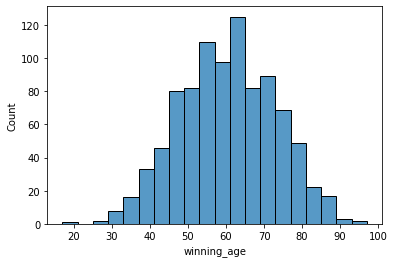

In [ ]:
sns.histplot(df_data.winning_age, bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



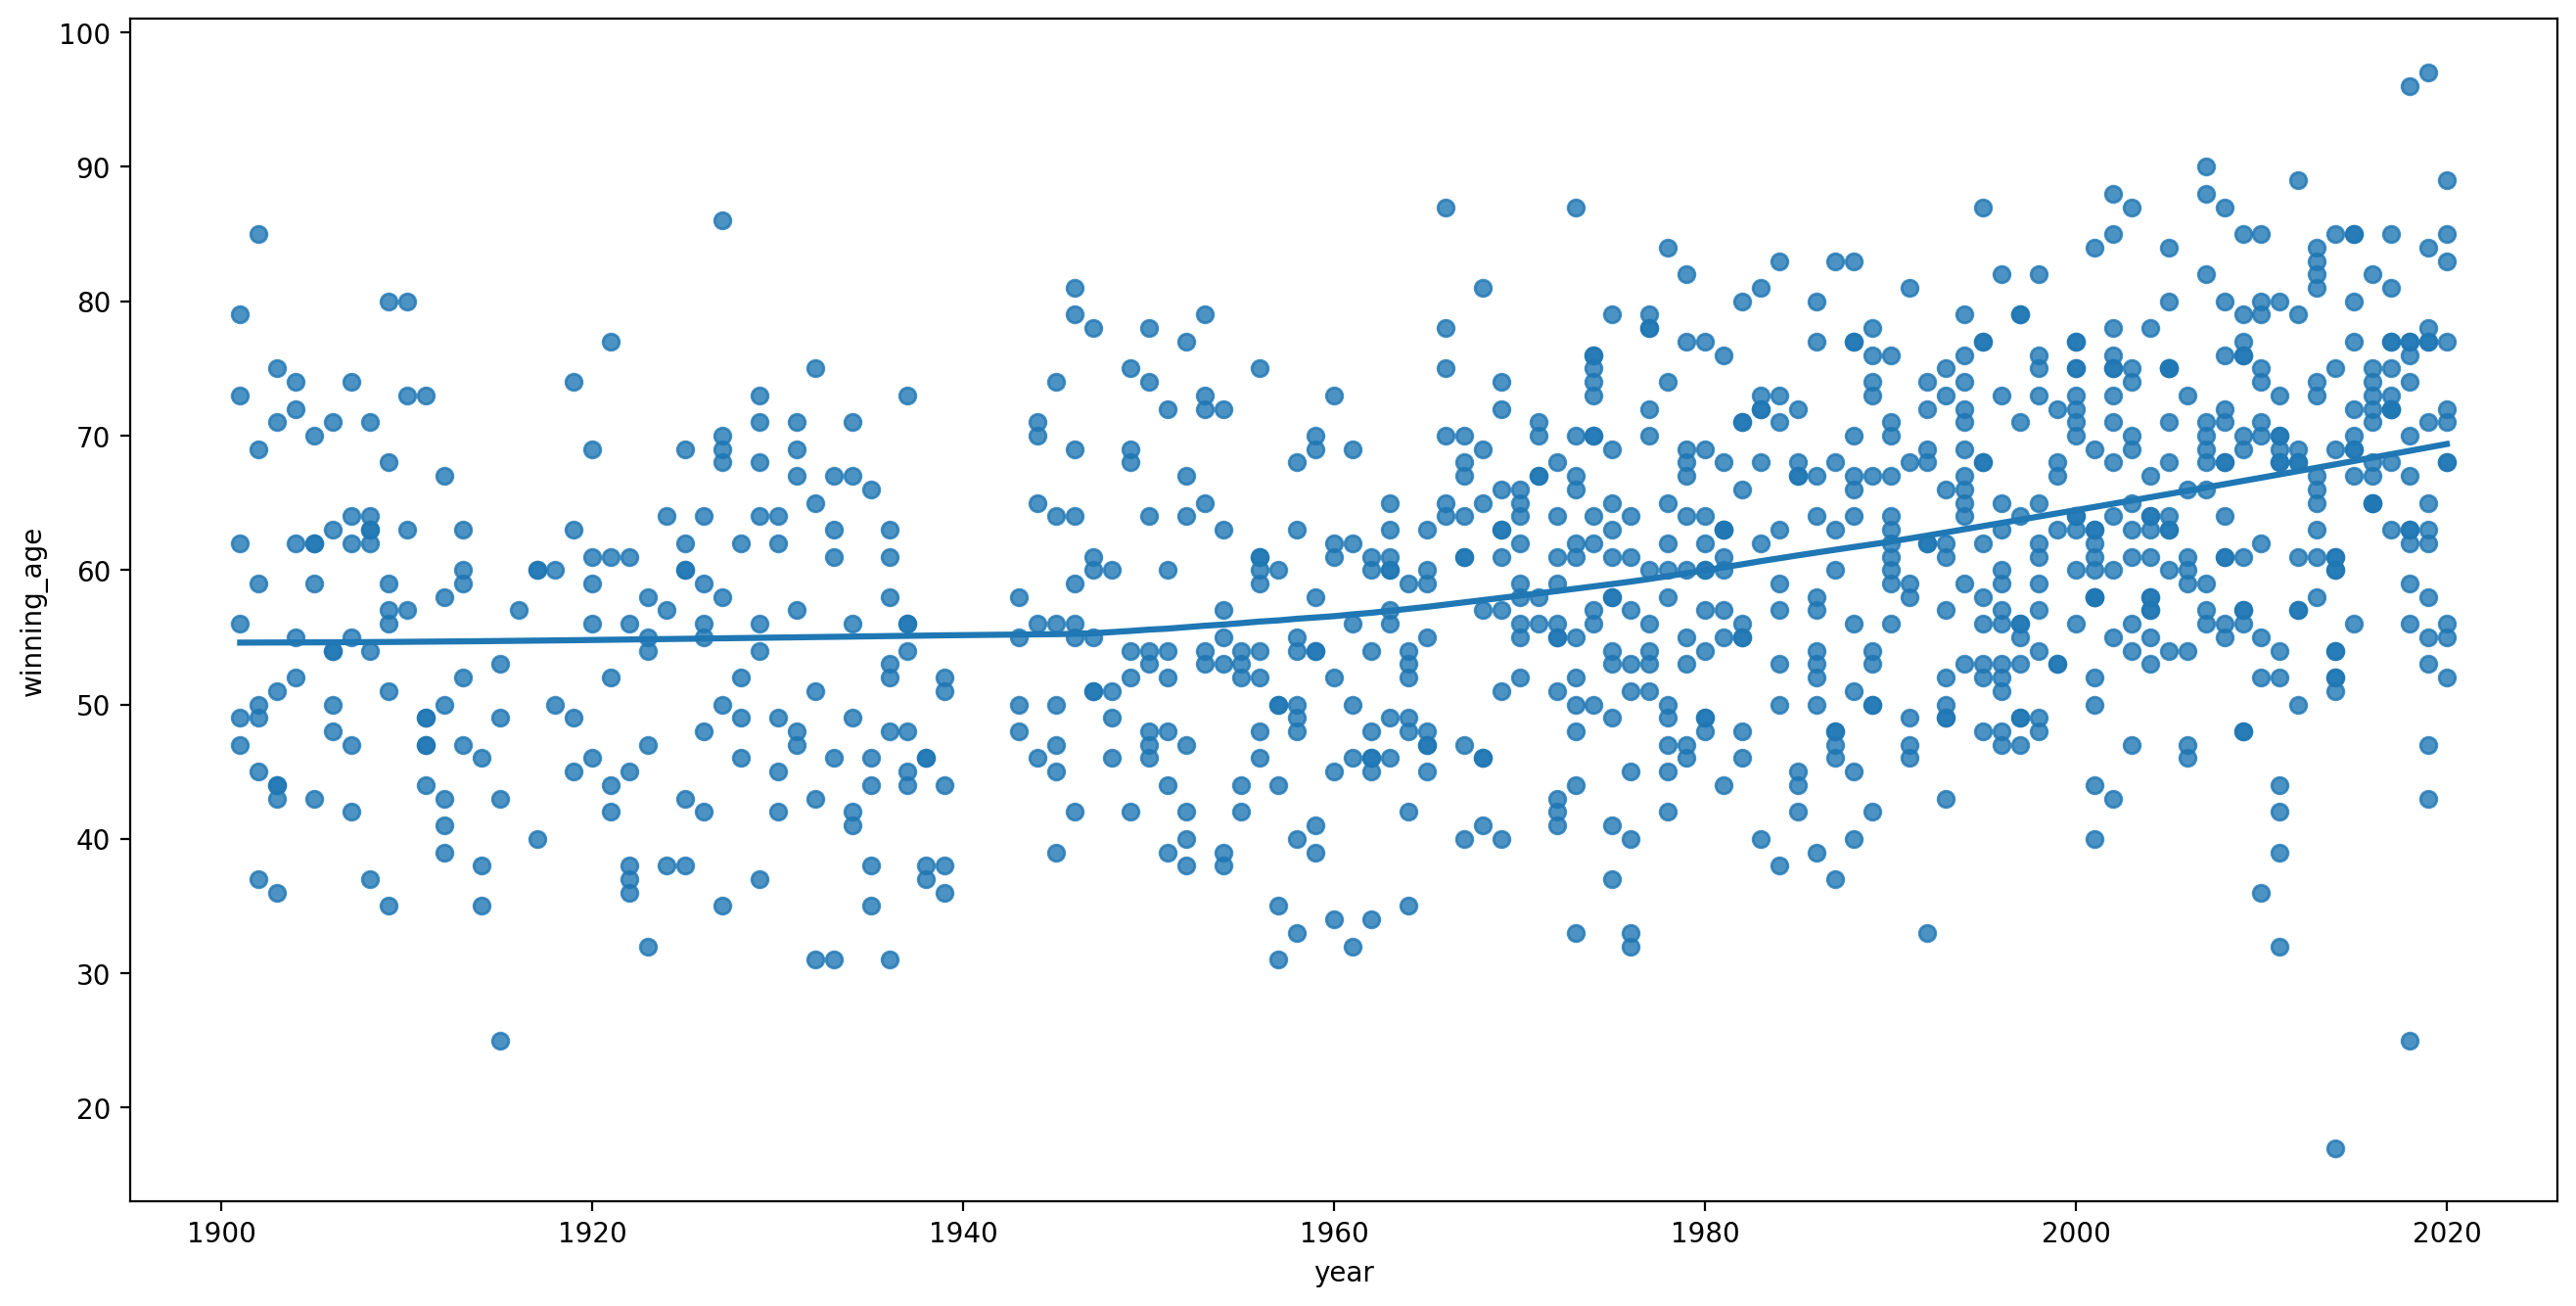

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
sns.regplot(df_data.year, df_data.winning_age, lowess=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



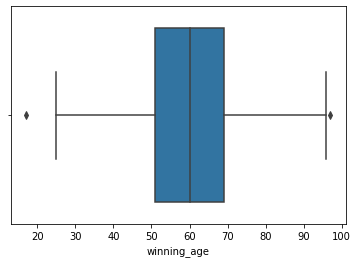

In [ ]:
sns.boxplot(df_data.winning_age)

In [ ]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

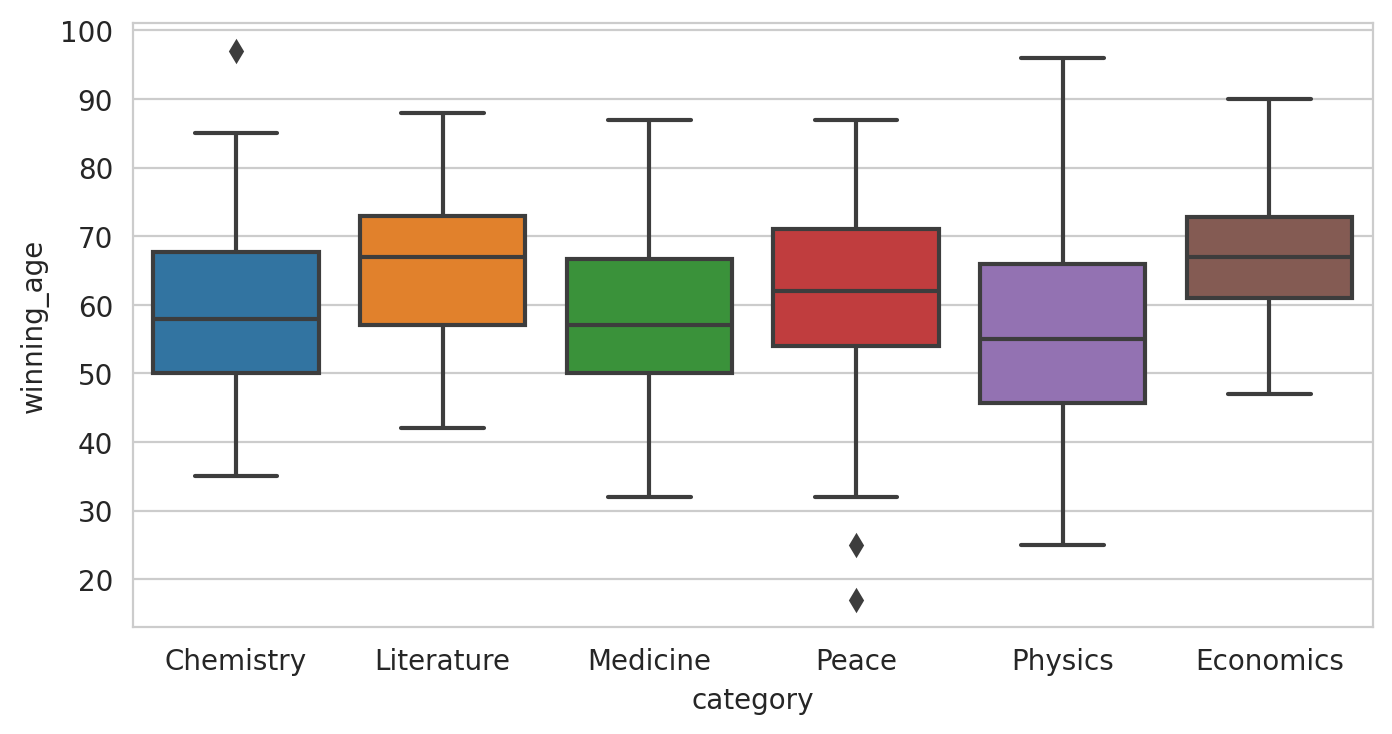

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')

plt.show()

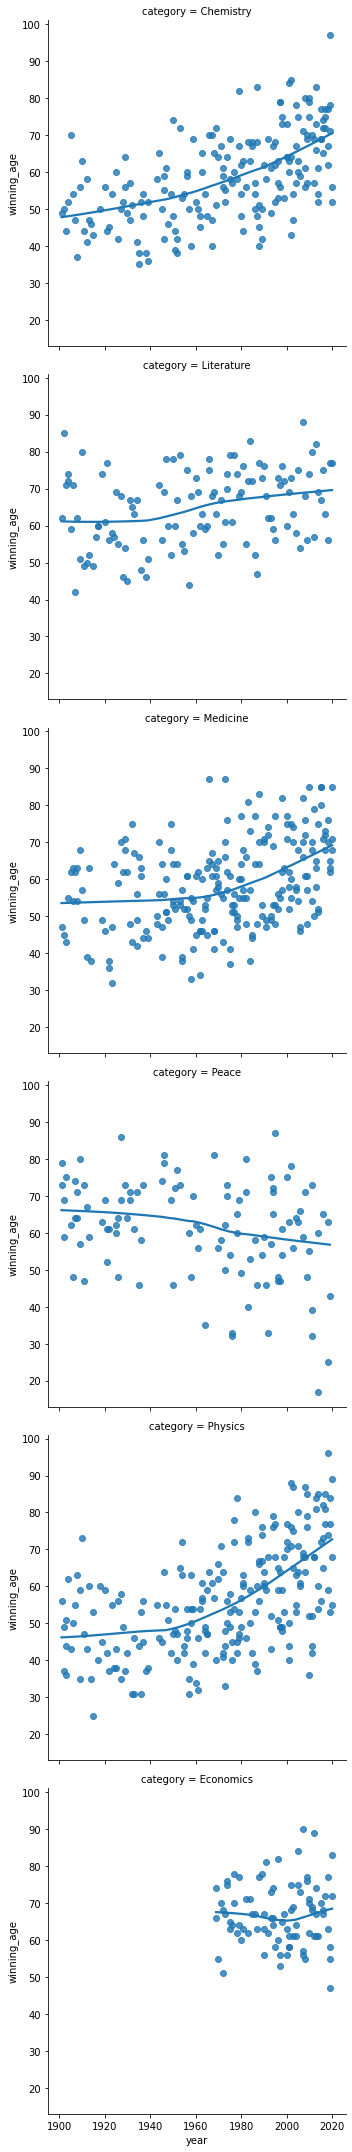

In [ ]:
sns.lmplot(data=df_data, x='year', y='winning_age', row='category', lowess=True)

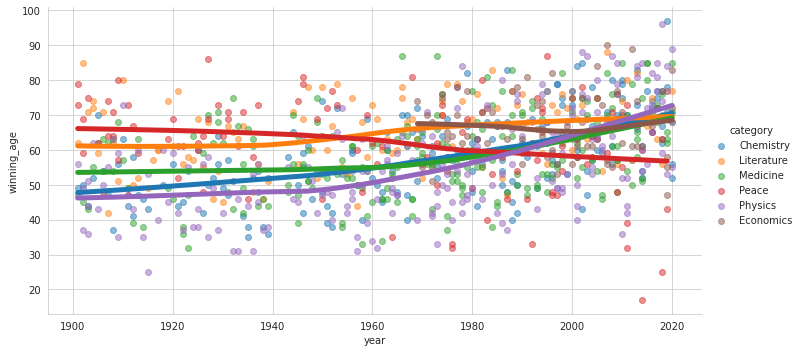

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.show()